# Data Exploration

In [1]:
%matplotlib inline

import pandas as pd
import thinkstats2
import thinkplot

In [43]:
raw_df = pd.read_csv('train.csv')
print raw_df.columns
raw_df = raw_df.drop(['PassengerId'],1)
raw_df['Sex'] = raw_df['Sex'].map({'female': 1, 'male': 0})
raw_df['Embarked'] = raw_df['Embarked'].map({'C': 0, 'Q': 1, 'S':2})

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')


# Clean Data

Going to remove unnecessary information in the dataframe and recode for easier computation

In [44]:
df = raw_df.drop(['Name', 'Ticket'],1)
df['Age'] = df['Age'].round()
age_bracket = [0,12,25,35,50,80]
#{'(0,12]': 0, '(12,25]': 1,'(25,35]': 2,'(35,50]': 3,'(50,80]': 4}
df['Age'] = pd.cut(df['Age'],bins = age_bracket, labels=[0,1,2,3,4])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,1,1,0,7.2500,NaN,2
1,1,1,1,3,1,0,71.2833,C85,0
2,1,3,1,2,0,0,7.9250,NaN,2
3,1,1,1,2,1,0,53.1000,C123,2
4,0,3,0,2,0,0,8.0500,NaN,2
5,0,3,0,NaN,0,0,8.4583,NaN,1
6,0,1,0,4,0,0,51.8625,E46,2
7,0,3,0,0,3,1,21.0750,NaN,2
8,1,3,1,2,0,2,11.1333,NaN,2
9,1,2,1,1,1,0,30.0708,NaN,0


# Overall Data

What are the percentages associated with each numerical category?

In [6]:
def findPercent(dataframe):
    columns = []
    results = []
    tempdf = dataframe.transpose().iterrows()
    for column_name, row in tempdf:
        columns.append(column_name)
    for variables in range(0,len(columns)):#len(columns)):   #for each column, do...
        if (type(dataframe[columns[variables]][0]) == type('str')):
#             d = dict(C=0, S=4127, Q=4098)
#             dataframe.from_dict()
            continue
        else:            
            series = pd.value_counts(dataframe[columns[variables]])
            total = sum(series)
            results.append((series/total).round(3))
    return pd.concat(results, axis=1)

In [31]:
df_per = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Embarked']]
# df_per['Age'] = df['Age'].dropna().astype(int)
findPercent(df_per)

,Survived,Pclass,Sex,0,SibSp,Parch,Embarked
0,0.616,NaN,0.648,0.095,0.682,0.761,0.189
1,0.384,0.242,0.352,0.325,0.235,0.132,0.087
2,NaN,0.207,NaN,0.275,0.031,0.090,0.724
3,NaN,0.551,NaN,0.215,0.018,0.006,NaN
4,NaN,NaN,NaN,0.090,0.020,0.004,NaN
5,NaN,NaN,NaN,NaN,0.006,0.006,NaN
6,NaN,NaN,NaN,NaN,NaN,0.001,NaN
8,NaN,NaN,NaN,NaN,0.008,NaN,NaN


In [27]:
a = pd.value_counts(df.Embarked)
(a/sum(a)).round(3)

3    0.724
1    0.189
2    0.087
Name: Embarked, dtype: float64

# Who survived?

Let's look into the data as split by whether the person survived

In [49]:
df_survived = raw_df[raw_df.Survived==1]
df_died = raw_df[raw_df.Survived==0]

df_means = pd.concat([df_died.mean(), df_survived.mean()], axis=1)
df_means['delta'] = abs(df_means[0]-df_means[1])
df_means

TypeError: concat() got an unexpected keyword argument 'labels'

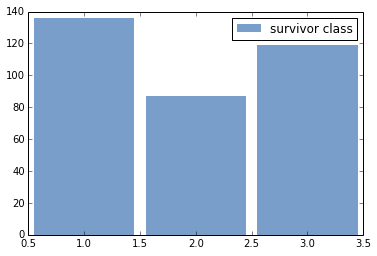

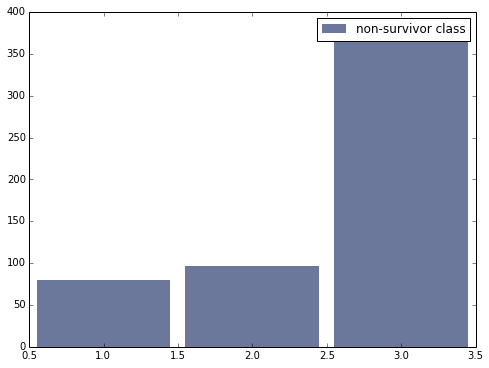

In [47]:
hist = thinkstats2.Hist(df_survived.Pclass)
thinkplot.Hist(hist, label='survivor class')
thinkplot.Show()
hist = thinkstats2.Hist(df_died.Pclass)
thinkplot.Hist(hist, label='non-survivor class')
thinkplot.Show()

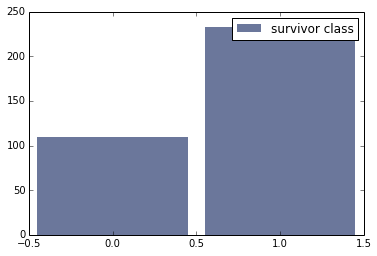

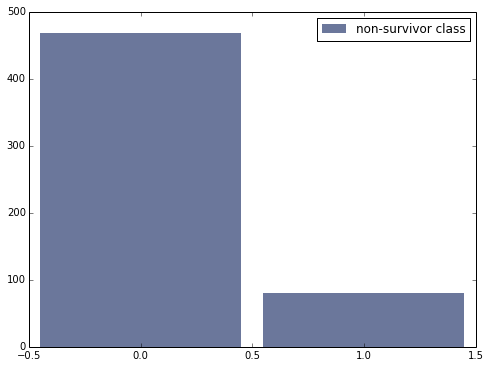

In [48]:
hist = thinkstats2.Hist(df_survived.Sex)
thinkplot.Hist(hist, label='survivor class')
thinkplot.Show()
hist = thinkstats2.Hist(df_died.Sex)
thinkplot.Hist(hist, label='non-survivor class')
thinkplot.Show()